In [1]:
import os
import wfdb
import matplotlib.pyplot as plt

In [2]:
Database_list = [
    # ("mitdb", "MIT-BIH Arrhythmia"),
    # ("incartdb", "St Petersburg INCART 12-lead Arrhythmia"),
    # ("edb", "European ST-T (EST)"),
    # ("svdb", "MIT-BIH Supraventricular Arrhythmia"),
    # ("ltdb", "MIT-BIH Long-Term ECG"),
    # ("stdb", "MIT-BIH ST Change"),
    # ("nstdb", "MIT-BIH Noise Stress Test"),
    ("sddb", "Sudden Cardiac Death Holter"),
    ("qtdb", "QT Database"),
]

In [7]:
def download_and_show_one_record():

    record = wfdb.rdrecord("100", pn_dir="mitdb")
    annotation = wfdb.rdann("100", "atr", pn_dir="mitdb")

    print(record.sig_name)
    print(record.fs)

    wfdb.plot_wfdb(record=record, annotation=annotation, title="MIT-BTH 100")


def download_all_database():
    wfdb.dl_database("mitdb", dl_dir="mitdb")
    wfdb.dl_database("incartdb", dl_dir="incartdb")
    wfdb.dl_database("edb", dl_dir="estdb")


def download_db(db_name: str, out_dir: str):
    if not os.path.isdir(out_dir) or not os.listdir(out_dir):
        print(f"[+] Downloading {db_name} -> {out_dir}")
        wfdb.dl_database(db_name, dl_dir=out_dir, keep_subdirs=False)
    else:
        print(f"[=] Found local {out_dir}, skip download")


def pick_one_record(db_name: str):
    recs = wfdb.get_record_list(db_name)
    if not recs:
        raise RuntimeError(f"No records found for {db_name}")
    return recs[0]


def summarize_record(rec, db_tag: str, rec_name: str):
    fs = rec.fs
    n_sig = rec.n_sig
    sig_len = rec.sig_len
    dur_sec = sig_len / fs if fs else None

    print(f"\n[{db_tag}] sample record: {rec_name}")
    print(f"- sampling rate (Hz): {fs}")
    print(f"- leads (n_sig): {n_sig} -> {rec.sig_name}")
    print(f"- total samples: {sig_len}")
    print(f"- duration (sec): {dur_sec:.2f}" if dur_sec else "- duration: N/A")


def plot_first_10s(db_dir: str, rec_name: str, fs: float):
    sampfrom, sampto = 0, int(10 * fs)
    record = wfdb.rdrecord(
        os.path.join(db_dir, rec_name), sampfrom=sampfrom, sampto=sampto
    )

    try:
        ann = None
        if os.path.exists(os.path.join(db_dir, f"{rec_name}.atr")):
            ann = wfdb.rdann(
                os.path.join(db_dir, rec_name), "atr", sampfrom=sampfrom, sampto=sampto
            )
    except Exception:
        ann = None

    wfdb.plot_wfdb(
        record=record, annotation=ann, title=f"{db_dir} {rec_name} (first 10s)"
    )
    plt.show()


def main():
    for db_name, db_tag in Database_list:
        local_dir = "../data/" + db_name
        download_db(db_name, local_dir)

        rec_name = pick_one_record(db_name)
        rec = wfdb.rdrecord(os.path.join(local_dir, rec_name))
        summarize_record(rec, db_tag, rec_name)
        plot_first_10s(local_dir, rec_name, rec.fs)

[=] Found local ../data/sddb, skip download

[Sudden Cardiac Death Holter] sample record: 30
- sampling rate (Hz): 250
- leads (n_sig): 2 -> ['ECG', 'ECG']
- total samples: 22099250
- duration (sec): 88397.00


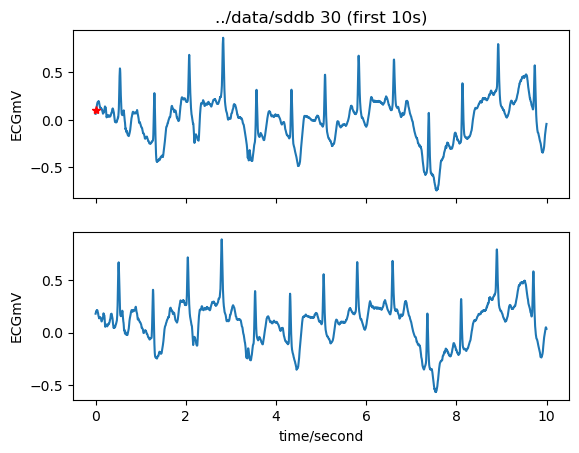

[+] Downloading qtdb -> ../data/qtdb
Generating record list for: sel100
Generating record list for: sel102
Generating record list for: sel103
Generating record list for: sel104
Generating record list for: sel114
Generating record list for: sel116
Generating record list for: sel117
Generating record list for: sel123
Generating record list for: sel14046
Generating record list for: sel14157
Generating record list for: sel14172
Generating record list for: sel15814
Generating record list for: sel16265
Generating record list for: sel16272
Generating record list for: sel16273
Generating record list for: sel16420
Generating record list for: sel16483
Generating record list for: sel16539
Generating record list for: sel16773
Generating record list for: sel16786
Generating record list for: sel16795
Generating record list for: sel17152
Generating record list for: sel17453
Generating record list for: sel213
Generating record list for: sel221
Generating record list for: sel223
Generating record list 

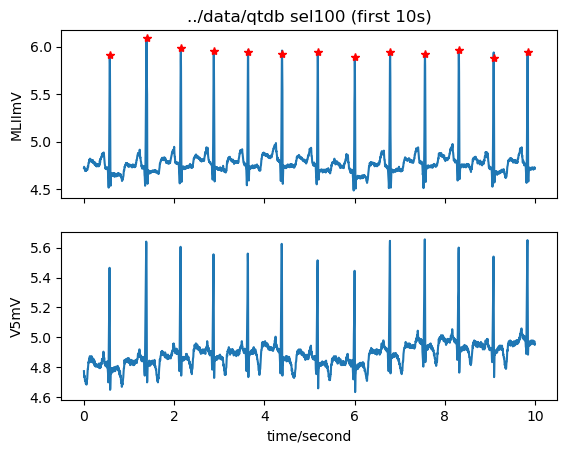

In [8]:
main()

In [ ]:
# import wfdb

# records = ["48", "49", "50", "51", "52"]

# for r in records:
#     wfdb.dl_files(
#         "sddb", files=[f"{r}", f"{r}.dat", f"{r}.hea", f"{r}.atr"], dl_dir="./sddb"
#     )